# Задача 22

In [164]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
import scikitplot as skplt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 24

%matplotlib inline

Прочитаем датасет и посмотрим на данные.

In [134]:
data = pd.read_csv('/Users/nikita/Downloads/lung-cancer.data', header=None)
data = data.rename(columns={0: 'Target'})
data.head()

,Target,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


Как мы видим, все данные имеют целые значения от 1 до 3.

In [135]:
data.describe()

,Target,1,2,3,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


Здесь можем посмотреть статистики по признакам. В данных есть пропуски, они обозначены знаком вопроса.

Реализуем решение задачи. Так как все данные категориальные, будем использовать one-hot-encoding.

In [199]:
def solve(data, method='kNN', feature_num=15, *args):
    if method == 'kNN':
        model = KNeighborsClassifier(*args)
    if method == 'SVM':
        model = SVC(*args, kernel='poly', probability=True)
    if method == 'Logloss':
        model = LogisticRegression()
    y = data['Target']
    X = data.drop('Target', axis=1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(X)
    X = enc.transform(X).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    estimator_for_feat_sel = SVC(kernel="linear")
    rfe = RFE(estimator=estimator_for_feat_sel, n_features_to_select=feature_num, step=1)
    rfe.fit(X, y)
    X_train = rfe.transform(X_train)
    X_test = rfe.transform(X_test)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    y_test = y_test.values
    skplt.metrics.plot_roc(y_test, y_prob)
    plt.title(method + ' ROC Curve. ' + str(feature_num) + ' features used.')
    plt.show()
    roc_auc_val = roc_auc_score(y_test, y_prob, multi_class='ovo')
    print('ROC-AUC score: {}\nF1 score: {}'.format(roc_auc_val, f1_score(y_test, y_pred, average='macro')))

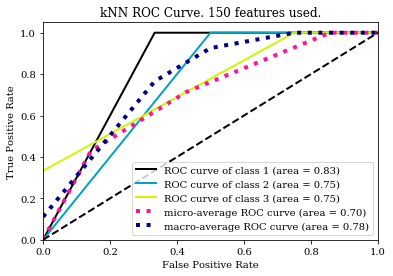

ROC-AUC score: 0.7962962962962964
F1 score: 0.47222222222222215


In [195]:
solve(data, method='kNN', feature_num=150)

Как мы видим, при использовании почти всех признаков, kNN дает F1-score равный 0.47. Попробуем уменьшить число признаков в 10 раз.

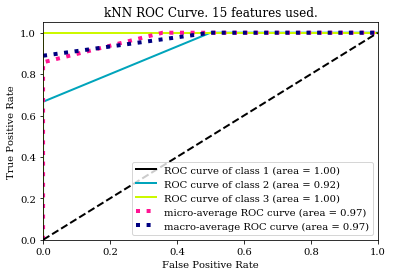

ROC-AUC score: 0.9814814814814815
F1 score: 0.8222222222222223


In [196]:
solve(data, method='kNN', feature_num=15)

Наблюдаем, что для класса 3 ROC-кривая превратилась в прямую и вообще, получились хорошие результаты на всех метриках. То есть, уменьшение числа признаков дало улучшение качества результата.

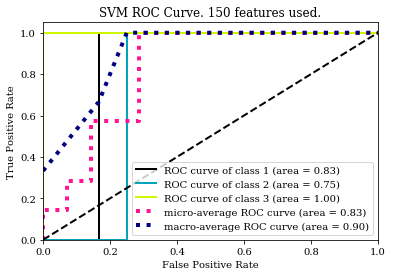

ROC-AUC score: 0.7777777777777778
F1 score: 0.8857142857142858


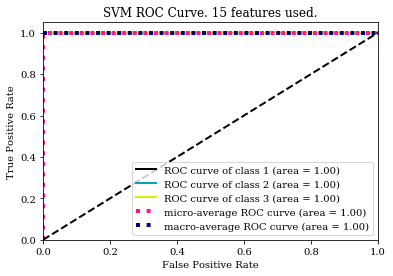

ROC-AUC score: 1.0
F1 score: 1.0


In [198]:
solve(data, method='SVM', feature_num=150)
solve(data, method='SVM', feature_num=15)

То же наблюдается и при использовании SVM с полиномиальным ядром.

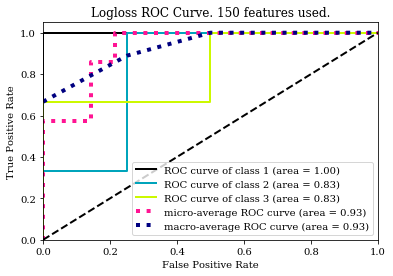

ROC-AUC score: 0.9259259259259259
F1 score: 0.7777777777777777


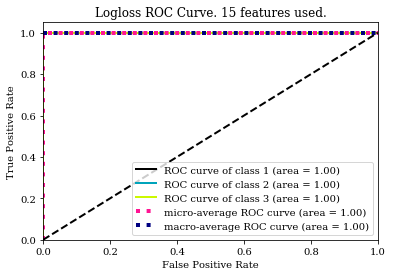

ROC-AUC score: 1.0
F1 score: 1.0


In [200]:
solve(data, method='Logloss', feature_num=150)
solve(data, method='Logloss', feature_num=15)

При использовании логистической регрессии на 15 признаках также были получены значения метрик, равные 1.0. Однако на большом количестве признаков результат оказался лучше.

**Вывод:** лучшими оказались SVM и логистическая регрессия. Они дают максимально возможное качество на тестовой выборке. При этом использование всех признаков не дает оптимальный результат, так как незначимые признаки вносят шум.